# Приоритизация гипотез и анализ результатов A/B теста в крупном интернет-магазине

Описание проекта
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

    Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')

except:
    display('File not found')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
#проверка по фреймворку ICE
data['ice_score'] = data['Impact'] * data['Confidence'] / data['Efforts']

data[['Hypothesis', 'ice_score']].sort_values('ice_score', ascending=False)

,Hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Побеждает гипотеза №8

In [5]:
#проверка по фреймворку RICE
data['rice_score'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']

data[['Hypothesis', 'rice_score']].sort_values('rice_score', ascending=False)

,Hypothesis,rice_score
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Добавление параметра Reach перераспределило приоритет. Учёт охвата пользователей (значение =10) позволил гипотезе №7 выйти на первое место, лучше начинать рассматривать её.

## Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:

    Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [6]:
#прочитаем файлы, создадим переменные

orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
#проверим деление на группы
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [8]:
round(visitors.query('group=="B"')['visitors'].sum() / visitors.query('group=="A"')['visitors'].sum() - 1,4)

0.0096

Численно группы почти равны, разница менее 1%

In [9]:
#проверим пересечение групп
orders.query('group=="A"')['visitorId'].drop_duplicates().isin(orders.query('group=="B"')['visitorId']).sum()

58

Группы пересекаются, есть 58 общих пользователей. **Вопрос для ревьюера**: надо ли их удалять?

In [10]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [11]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])]
                                      .agg({
                                          'date' : 'max',
                                          'group' : 'max',
                                          'transactionId' : 'nunique',
                                          'visitorId' : 'nunique',
                                          'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

In [12]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups
                      .apply(
                          lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({
                                 'date' : 'max',
                                 'group' : 'max',
                                 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

In [13]:
# объединяем кумулятивные данные в одной таблице, переименовываем столбцы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Text(0.5, 0, 'date')

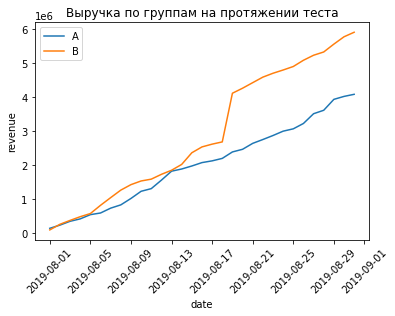

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Выручка по группам на протяжении теста')
plt.xticks(rotation=45);
plt.ylabel('revenue')
plt.xlabel('date')

Выручка росла в течение всего теста, примерно на середине группа В резко вырвалась вперёд. Похоже, был крупный заказ

Text(0.5, 0, 'date')

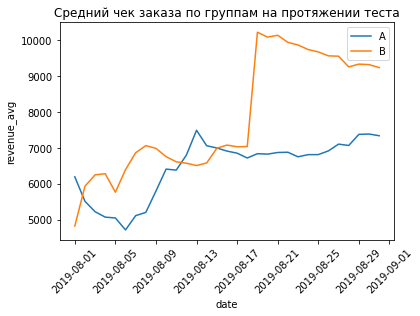

In [15]:
#построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Средний чек заказа по группам на протяжении теста')
plt.legend() 
plt.xticks(rotation=45);
plt.ylabel('revenue_avg')
plt.xlabel('date')

Средний чек группы В также сделал резкий скачок. Вывод делать рано, скорее всего нужен анализ аномальных заказов.

Text(0.5, 0, 'date')

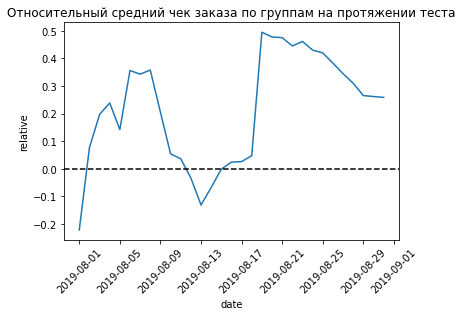

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45);
plt.title('Относительный средний чек заказа по группам на протяжении теста')
plt.ylabel('relative')
plt.xlabel('date')

Чётко видно несколько пиков на графике, видимо, в эти даты делались самые крупные заказы.

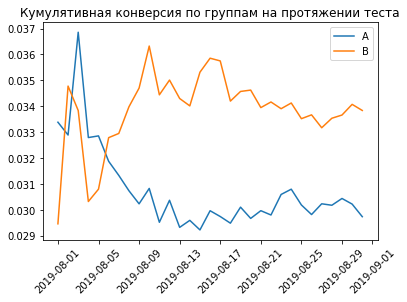

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам на протяжении теста')
plt.xticks(rotation=45);

Изначально лидировала группа А, но примерно на пятый день теста вперёд вырвалась группа В и сохранила лидерство до конца теста. Разница в конверсии составила около 4-6%.

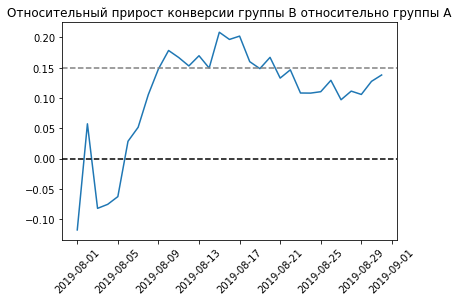

In [18]:
#построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], \
                                      left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xticks(rotation=45);

Видно, что конверсия группы В относительно группы А резко улучшилась на 5-й день и продолжала сохранять преимущество до конца теста. Относительный прирост примерно 15%

In [19]:
#считаем число заказов на пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

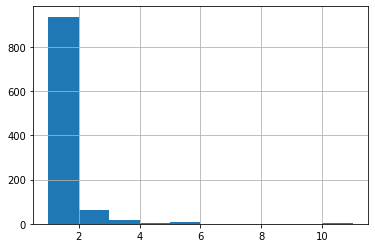

In [20]:
ordersByUsers['orders'].hist();

Уже можно сказать, что большая часть пользователей делает только 1 заказ, небольшая часть - больше 2-х заказов.

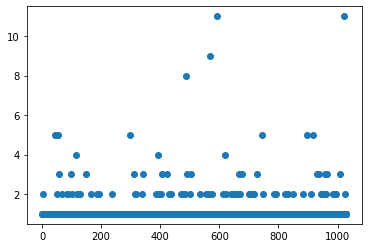

In [21]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']); 

По этому графику видно, что пользователей, заказывающих больше двух раз, относительно мало.

In [22]:
#определим 95 и 99 процентили
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Только 5% пользователей сделали 2 заказа и только 1% заказали более двух раз. Выберем границу в 95%

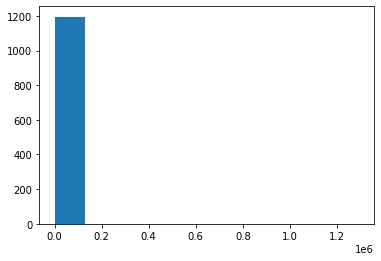

In [23]:
#рассмотрим распределение прибыли
plt.hist(orders['revenue']);

Видно, что все заказы были ценой до 200000, аномальных значений на гистограмме нет.

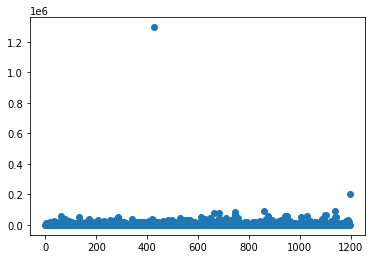

In [24]:
#построим точечный график
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']);

Здесь аномалии видны, заказ ценой около 200000 и более 1200000

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

По процентилям можно сказать, что только 5% заказов были дороже 28000, и только 1% — дороже 58000. Границу берём в 95%

In [26]:
#считаем число заказов по группам

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [27]:
#делим на выборки, в которых пользователям из разных групп будет соответствовать количество заказов
#тем, кто ничего не заказал, будут соответствовать нули

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Формулируем гипотезы:

H_0: Среднее число заказов группы А = среднему числу заказов группы В.

H_a: Среднее число заказов группы А ≠ среднему числу заказов группы В.

Уровень значимости 5%

In [28]:
#проводим тест Манна-Уитни, уровень значимости 0.05
display("P-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("Конверсия группы В относительно группы А = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'P-value = 0.017'

'Конверсия группы В относительно группы А = 0.138'

P-value меньше 0.05, отвергаем нулевую гипотезу, статистически между выборками есть различия. Разницу в значениях конверсии уточнили - 13,8% в пользу группы В

Формулируем гипотезы:

H_0: Средний чек группы А = среднему чеку группы В.

H_a: Средний чек группы А ≠ среднему чеку группы В.

Уровень значимости 5%

In [29]:
display('P-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

display('Разница между средними чеками групп = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'P-value = 0.729'

'Разница между средними чеками групп = 0.259'

Между средними чеками выборок нет статистических различий, p-value > 0.05. А относительное различие между средними чеками групп почти 26%, дальше проанализируем на выбросы

In [30]:
#выделим пользователей из групп с более чем 2 заказами
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

#пользователи с покупками дороже 28000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head())
display(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

74

Получили всего 74 выброса.

In [31]:
#отфильтруем значения "сырых" данных, исключим аномальные значения
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 



Формулируем гипотезы:

H_0: Среднее число заказов по отфильтрованным данным группы А = среднему числу заказов по отфильтрованным данным группы В.

H_a: Среднее число заказов по отфильтрованным данным группы А  ≠ среднему числу заказов по отфильтрованным данным группы В.

Уровень значимости 5%

In [32]:
display('P-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

display('Разница в конверсии группы В относительно группы А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'P-value = 0.013'

'Разница в конверсии группы В относительно группы А = 0.173'

Тест по отфильтрованным данным серьёзных отличий не показал. Статистически выборки различны, сегмент В значительно лучше: разница в конверсии группы В относительно группы А — 17.3%

Формулируем гипотезы:

H_0: Средний чек по отфильтрованным данным группы А = среднему чеку по отфильтрованным данным группы В.

H_a: Средний чек по отфильтрованным данным группы А ≠ среднему чеку по отфильтрованным данным группы В.

Уровень значимости 5%

In [33]:
#фильтруем данные по среднему чеку, повторяем тест
display(
    'P-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "Разница между средними чеками групп = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'P-value = 0.738'

'Разница между средними чеками групп = -0.020'

Между группами также нет статистических различий, но благодаря удалению выбросов разница в выручке значительно снизилась, до -2%.

**Общий вывод**. В результате анализа проведённого A/B теста, а также проверки и фильтрации выбросов можно заключить, что группа В лидирует по показателю конверсии относительно группы А — 17.3%. Проведение теста можно останавливать.